In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#from matplotlib.animation import FuncAnimation


# plt.rcParams['figure.figsize'] = [12,6]
#plt.rcParams['figure.dpi'] = 300
%config InlineBackend.figure_format = 'png'


# polices de type LaTeX
# plt.rcParams['text.usetex'] = True
# from matplotlib import rc
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

# définition du répertoire de sauvegarde
chemin = 'C:/Users/matth/Desktop'

In [4]:

h = 6000 
H = 1 
l = 100


g = 10 
gamma = 0.075 
mu = 1000 
lc = np.sqrt(gamma/mu/g) 
P_0 = 100000


k = (2*np.pi)/l 
omega = np.sqrt(g*k*(1+(k*lc)**2)*np.tanh(h*k))
v_phi = omega/k 
A = H*g/(2*omega)/np.cosh(k*h) 




# DÉPHASAGE AUTOMATIQUE pour montrer une période de vague non coupée
t0 = np.pi/(2*omega)

# DÉFINITION DES FRONTIÈRES POUR LES TRACÉS
zmin = 5985
zmax = 6000.5
xmin = 0
xmax = 100

# DÉFINTION DES FONCTIONS
psi = lambda z: A*np.cosh(k*z) # amplitude du champ scalaire potentiel des vitesses

phi = lambda x,z,t: psi(z)*np.exp(1j*(omega*t-k*x)) # champ scalaire potentiel des vitesses

vx = lambda x,z,t: np.real(-1j*k*A*np.cosh(k*z)*np.exp(1j*(omega*t-k*x))) # composante des vitesses selon l'axe (Ox)
vz = lambda x,z,t: np.real(A*k*np.sinh(k*z)*np.exp(1j*(omega*t-k*x))) # composante des vitesses selon l'axe (Oz)
surf = lambda x,t: H/2*np.sin(omega*t-k*x)



# CARTE DES VITESSES
# fonction des vitesses
def vitesse(X,Z, t=t0):
    """ renvoie le champ des vitesses à t """
    return np.array([ vx(X,Z,t), vz(X,Z,t) ])

# échantillonnage pour les tracés des vitesses

step_vitesse_x = (xmax-xmin)/20
step_vitesse_z = (zmax-zmin)/20

# grille pour les vitesses
Xv, Zv = np.meshgrid(np.arange(xmin, xmax, step_vitesse_x), np.arange(zmin, zmax, step_vitesse_z)) # fabrication de la grille

# calcul des valeurs pour les vitesses
vX, vZ = vitesse(Xv, Zv) # calcul des vitesses sur la grille
M = np.hypot(vX, vZ) # matrice des normes des vitesses
M[M == 0] = 1 # empecher les erreurs de division par 0
#vX /= M # M avant, normalisation de chaque vecteur
#vZ /= M

# CARTE DES POTENTIELS
# fonction des potentiels
def potentiel(X,Z, t=t0):
    return np.real(phi(X,Z,t))

# échantillonnage pour les tracés des potentiels
step_potentiel_x = (xmax-xmin)/150
step_potentiel_z = (zmax-zmin)/150

# grille pour les potentiels
Xp, Zp = np.meshgrid(np.arange(xmin, xmax, step_potentiel_x), np.arange(zmin, zmax, step_potentiel_z))
# calcul des valeurs pour les potentiels
potentiels = potentiel(Xp, Zp)

# CARTE DES PRESSIONS
# fonction des pressions
def pression(X,Z, t=t0):
    return P_0 + mu*g*(h-Z)-mu*(np.real(1j*omega*phi(X,Z,t)))

# échantillonnage pour les tracés des pressions
step_pression_x = (xmax-xmin)/150
step_pression_z = (zmax-zmin)/150

# grille pour les pression
Xp, Zp = np.meshgrid(np.arange(xmin, xmax, step_pression_x), np.arange(zmin, zmax, step_pression_z))
# calcul des valeurs pour les pressions
pressions = pression(Xp, Zp)

<Figure size 432x288 with 0 Axes>

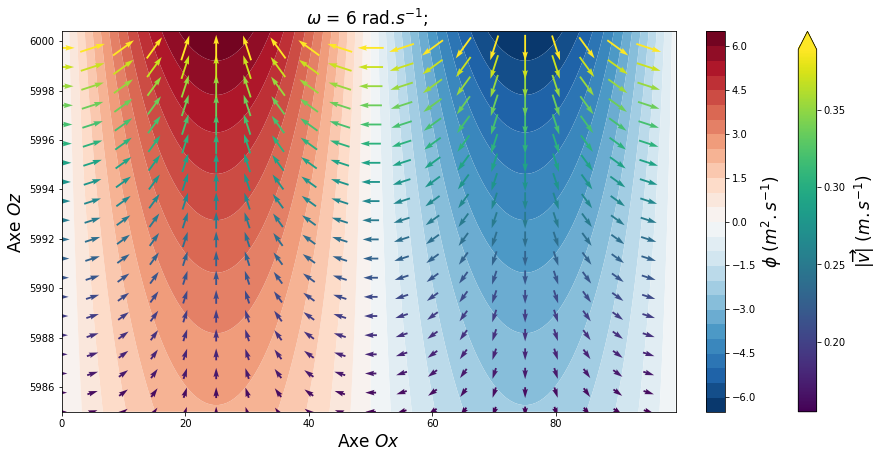

In [5]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import cm

plt.clf()

# définition des graphes
fig, ax = plt.subplots(1, 1, figsize=[11, 7])
ax.grid(False)
# ajout des textes
plt.ylabel('Axe $Oz$', fontsize=17)
plt.xlabel('Axe $Ox$', fontsize=17)

# STRINGS
stromega = '$\omega$ = 6 rad.$s^{-1}$; '


# AXES SECONDAIRES
axinsR = inset_axes(ax, width="3%", height="100%", loc='lower left',
                   bbox_to_anchor=(1.05, 0, 1, 1), bbox_transform=ax.transAxes, borderpad=0)
axinsQ = inset_axes(ax, width="3%", height="100%", loc='lower left',
                   bbox_to_anchor=(1.2, 0, 1, 1), bbox_transform=ax.transAxes, borderpad=0)


# JOLIS DESSINS DES CARTES DE CHAMP
ax.set_title(stromega, fontsize=17)


# CHAMP SCALAIRE DES POTENTIELS
P = ax.contourf(Xp, Zp, potentiels, 30, cmap='RdBu_r', antialiased=True)
barP = fig.colorbar(P, extend='max', cax=axinsR, aspect=20)
barP.set_label("$\phi$ ($m^2.s^{-1}$)", fontsize=17)

# CHAMP VECTORIEL DES VITESSES
V = ax.quiver(Xv,Zv,vX,vZ,M, pivot='mid', cmap=cm.viridis)
#qk = ax.quiverkey(V, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='W',coordinates='figure')
barV = fig.colorbar(V,extend='max', orientation='vertical', aspect=10, cax=axinsQ)
barV.set_label("$\|\overrightarrow{v}\|$ ($m.s^{-1}$)", fontsize=17)

# LIGNES DE CHAMP (se substitue au précédent)
# lw = 5*M / M.max()
# W = ax.streamplot(X,Z,vX,vZ, density=1, color='black', linewidth=lw)



plt.savefig(chemin+'hhhhh.pdf', dpi=500, bbox_inches='tight', facecolor='w', edgecolor='w',orientation='portrait')
# autres couleurs: plt.cm.nipy_spectral, plt.cm.jet, RdGY, RdBu_r, Spectral ('r' à la fin veut dire "reverse")
# plt.cm.cividis, plt.cm.viridis, plt.cm.gist_earth